In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [364]:
# df = pd.read_csv(r"J:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NN_Latest\6lambda2\6lambda2\signal\2024-05-24_15h02m55s.csv")
df_polysignal = pd.read_csv(r"J:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NN_Latest\6lambda2\6lambda2\signal\2024-05-24_15h02m55s-PolySignal.csv", header=None)
df_rawsignal = pd.read_csv(r"J:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NN_Latest\6lambda2\6lambda2\signal\2024-05-24_15h02m55s-RawSignal.csv", header=None)
df_rawsignal_noise = pd.read_csv(r"J:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NN_Latest\noise-20240527T224337Z-001\noise\2024-05-24_16h12m33s-RawSignal.csv",header=None)
df_polysignal_noise = pd.read_csv(r"J:\Users\Devin\Desktop\Spin Physics Work\ANN Github\NMR-Fermilab\ANN-NMR\NN_Latest\noise-20240527T224337Z-001\noise\2024-05-24_16h12m33s-PolySignal.csv",header=None)
df = pd.read_csv("Test.csv",header=None)


In [367]:
# df_polysignal = df_polysignal.drop([0],axis=1)
# df_rawsignal = df_rawsignal.drop([0],axis=1)
# df_rawsignal_noise = df_rawsignal_noise.drop([0],axis=1)
# df = df.drop(columns=[500,501])
# df = df.drop(0)

In [368]:
df_rawsignal_noise

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,-0.041522,-0.041322,-0.040896,-0.040481,-0.040041,-0.039625,-0.039205,-0.038772,-0.038363,-0.037942,...,-0.055443,-0.055937,-0.056461,-0.056932,-0.057448,-0.057939,-0.058451,-0.058972,-0.059469,-0.059728
1,-0.030506,-0.030351,-0.029830,-0.029470,-0.029033,-0.028549,-0.028173,-0.027672,-0.027393,-0.026915,...,-0.057864,-0.058257,-0.058887,-0.059286,-0.059859,-0.060376,-0.060848,-0.061370,-0.061749,-0.062099
2,-0.044815,-0.044557,-0.044293,-0.043726,-0.043338,-0.042930,-0.042435,-0.042119,-0.041613,-0.041240,...,-0.058592,-0.059252,-0.059633,-0.060275,-0.060695,-0.061143,-0.061762,-0.062120,-0.062748,-0.062986
3,-0.044721,-0.044569,-0.044000,-0.043745,-0.043184,-0.042816,-0.042432,-0.041876,-0.041631,-0.041086,...,-0.058636,-0.059027,-0.059661,-0.059996,-0.060630,-0.061146,-0.061529,-0.062221,-0.062566,-0.062889
4,-0.045477,-0.045221,-0.044900,-0.044423,-0.044094,-0.043591,-0.043103,-0.042805,-0.042252,-0.041966,...,-0.059358,-0.059940,-0.060329,-0.060893,-0.061323,-0.061863,-0.062437,-0.062730,-0.063435,-0.063606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,-0.656747,-0.657323,-0.658490,-0.659963,-0.661070,-0.662409,-0.663713,-0.664840,-0.666383,-0.667395,...,-1.283217,-1.284274,-1.285654,-1.286634,-1.288036,-1.289150,-1.290240,-1.291733,-1.292683,-1.293346
1494,-0.655971,-0.656626,-0.657827,-0.659150,-0.660433,-0.661603,-0.662909,-0.664254,-0.665521,-0.666816,...,-1.282715,-1.283887,-1.285067,-1.286259,-1.287532,-1.288694,-1.289902,-1.291161,-1.292317,-1.292917
1495,-0.669505,-0.670122,-0.671340,-0.672678,-0.673923,-0.675197,-0.676494,-0.677731,-0.679131,-0.680298,...,-1.297748,-1.298922,-1.300153,-1.301280,-1.302609,-1.303691,-1.304889,-1.306196,-1.307293,-1.307944
1496,-0.671828,-0.672387,-0.673749,-0.674907,-0.676324,-0.677620,-0.678777,-0.680157,-0.681337,-0.682729,...,-1.300341,-1.301703,-1.302805,-1.304047,-1.305229,-1.306381,-1.307673,-1.308788,-1.310061,-1.310596


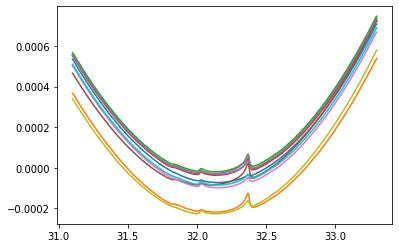

In [349]:
x = np.linspace(31.1,33.3,500)
for i in range(10):
    # plt.figure()
    plt.plot(x,df.iloc[i])
    # plt.show()
# plt.plot(x,df.iloc[0])

ValueError: x and y must have same first dimension, but have shapes (500,) and (501,)

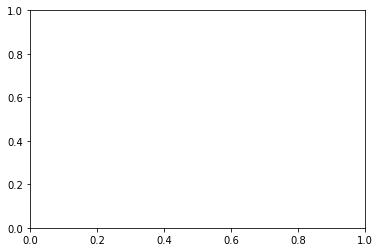

In [372]:
for i in range(1):
    # plt.figure()
    plt.plot(x,df_polysignal.iloc[i])
    # plt.show()